In [23]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
import numpy as np
from ResoFit.simulation import Simulation
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
%matplotlib notebook
overwrite_csv = False
folder = 'data/IPTS_19558/reso_data_19558'
data_file1 = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
experiment1 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=True)
# experiment1.slice(slice_start=300, reset_index=False)
# peak_df = experiment1.find_peak()
source_to_detector_m = 16.45
simulation = Simulation(energy_min=78, energy_max=82, energy_step=0.01, database='ENDF_VII')
simulation.add_layer(layer='Gd', layer_thickness_mm=0.15)

In [3]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=False)
x_n = simulation.x_tof_us
y_n = 1-simulation.y_att

/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_78.0_82.0_0.01_

In [4]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=True)
x_np = simulation.x_tof_us
y_np = 1-simulation.y_att

/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_78.0_82.0_0.01_

<IPython.core.display.Javascript object>


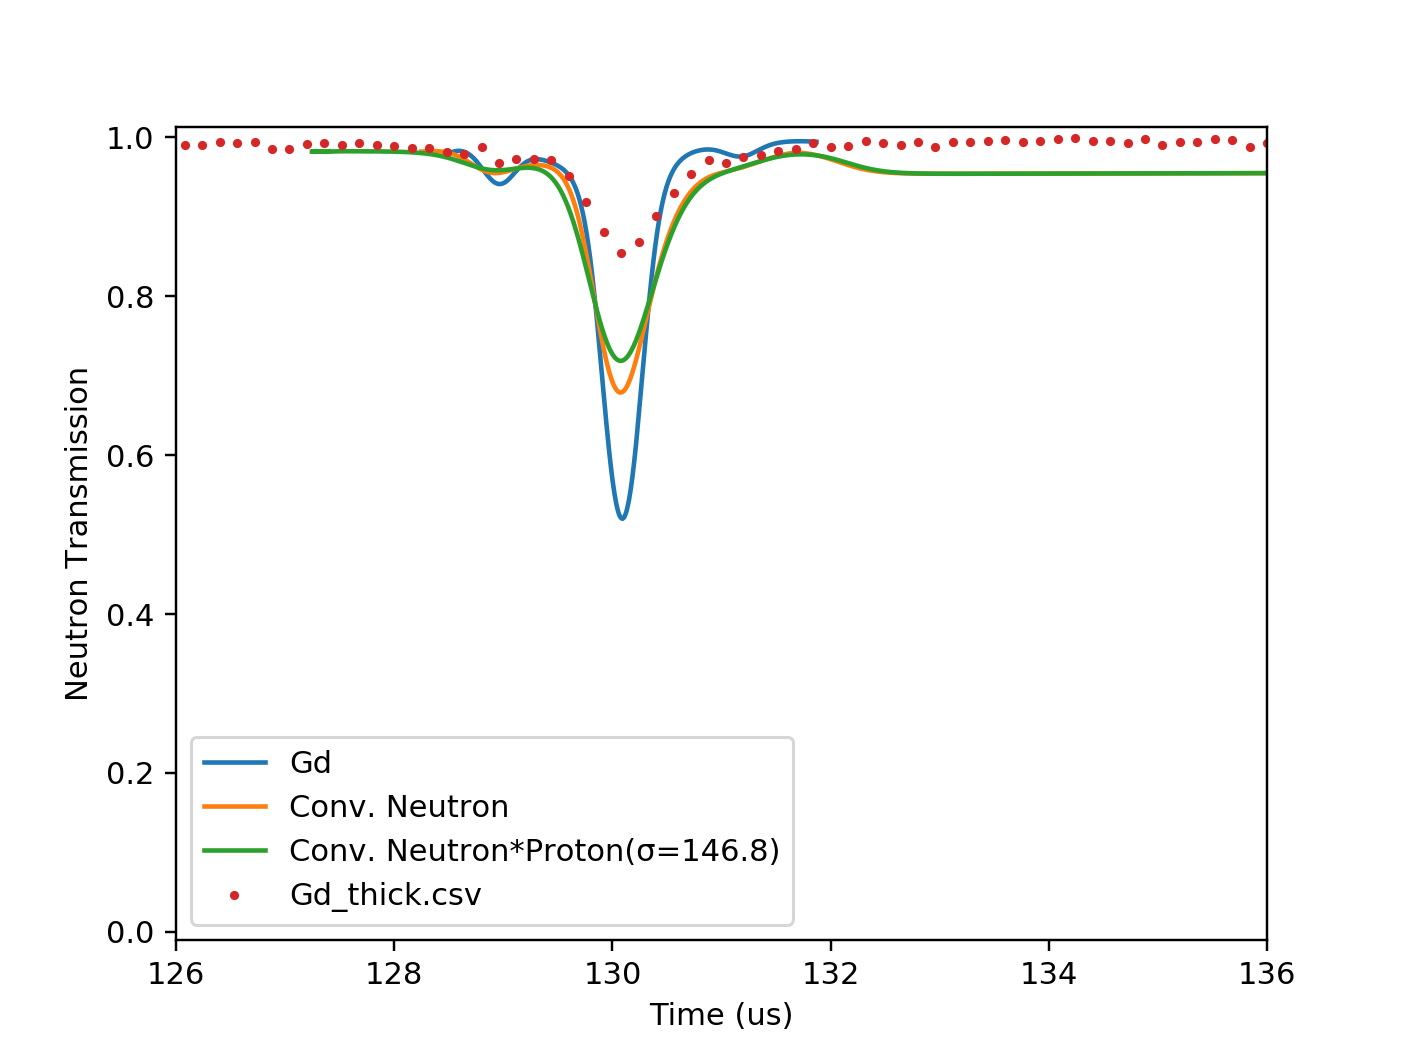

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.78


In [5]:
d = 5.2
fig = simulation.plot_simu(x_type='time', y_type='transmission', source_to_detector_m=source_to_detector_m, offset_us=2.78,
                          mixed=False, all_layers=True)
fig.axes[0].plot(x_n+1.95-d, y_n, label='Conv. Neutron')
fig.axes[0].plot(x_np+0.03-d, y_np, label='Conv. Neutron*Proton(\u03C3=146.8)')
ax = experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# ax.plot(x_np300-d, y_np300, label='Conv. Neutron*Proton(\u03C3=300)')
# ax.plot(x_np500-d, y_np500, label='Conv. Neutron*Proton(\u03C3=500)')
# experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# plt.plot(simulation.x_tof_us-5.2, 1-simulation.y_att, label='Conv. N*P(\u03C3=146.8)')
ax.set_xlim(left=126, right=136)
ax.legend()

In [13]:
df = simulation.neutron_pulse.shape_tof_df_interp.set_index('tof_us')
y0 = np.array(df.sum(axis=1))

In [16]:
df_peak = df * simulation.o_reso.total_signal['transmission']
y1 = np.array(df_peak.sum(axis=1))

<IPython.core.display.Javascript object>


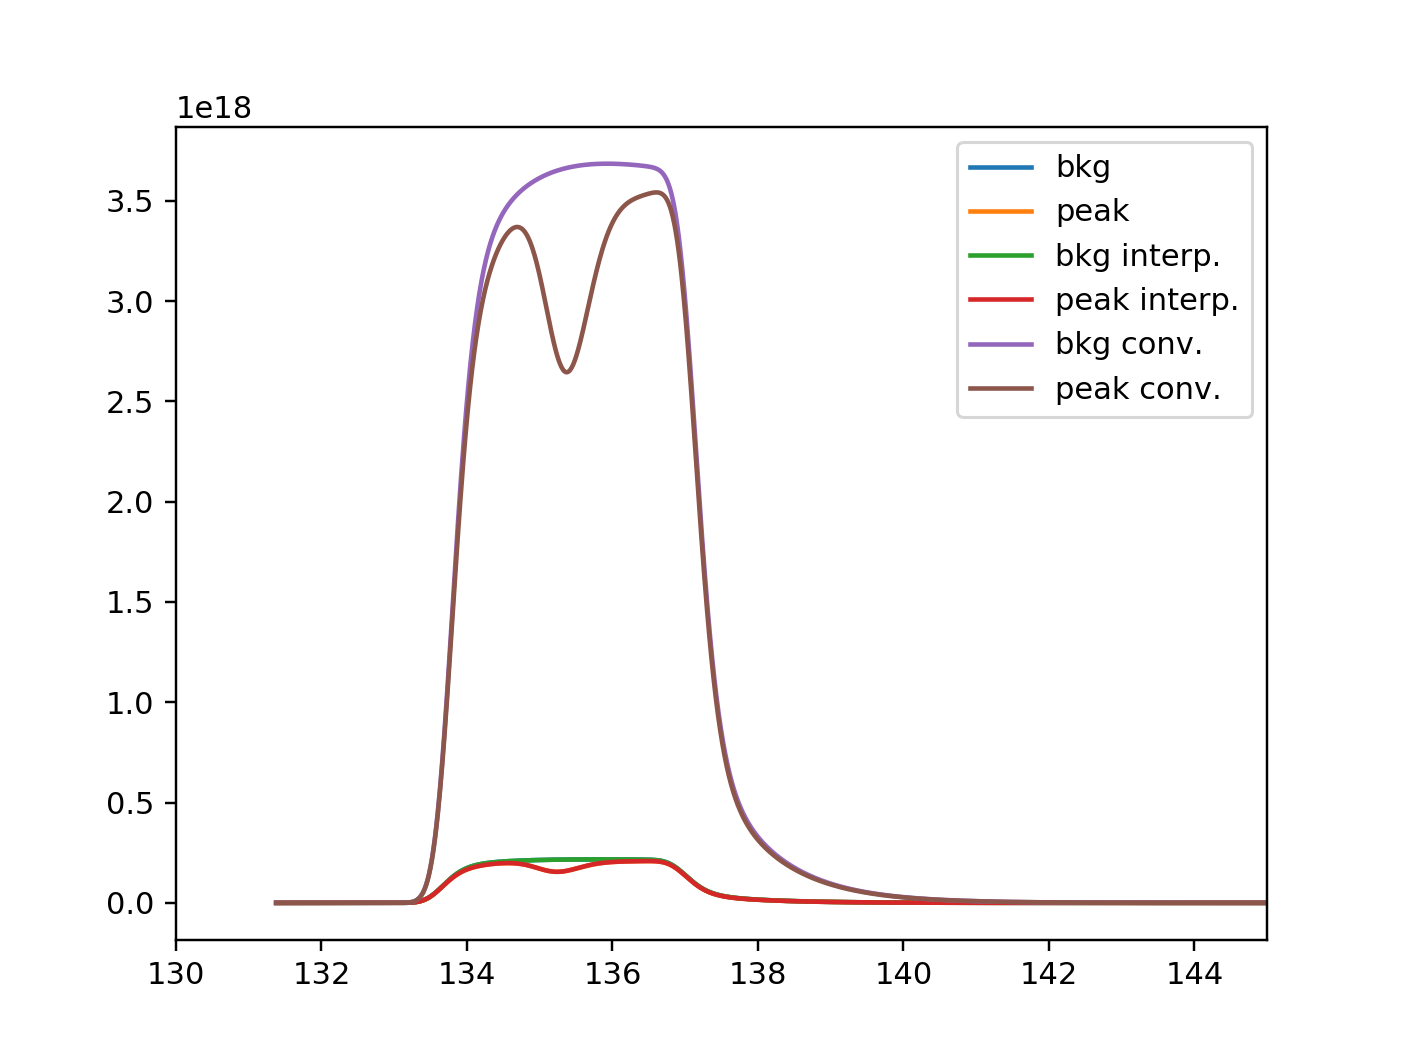

In [87]:
fig0, ax0 = plt.subplots()
ax0.plot(t_us, y0, label='bkg')
ax0.plot(t_us, y1, label='peak')
ax0.plot(t_new, y0_interp, label='bkg interp.')
ax0.plot(t_new, y1_interp, label='peak interp.')
ax0.plot(t_conv, y0_conv, label='bkg conv.')
ax0.plot(t_conv, y1_conv, label='peak conv.')
ax0.set_xlim(left=130, right=145)
ax0.legend()

In [31]:
t_us = np.array(df.index)
t_min = t_us.min()
t_max = t_us.max()
print(t_min)
print(t_max)

131.37422070093
318.34941073604193


In [38]:
t_new = np.arange(131.38, 318.34, 0.01)
t_new

array([131.38, 131.39, 131.4 , ..., 318.31, 318.32, 318.33])

In [39]:
ob_function = interp1d(x=t_us, y=y0, kind='cubic')
y0_interp = ob_function(t_new)

In [40]:
peak_function = interp1d(x=t_us, y=y1, kind='cubic')
y1_interp = peak_function(t_new)

<IPython.core.display.Javascript object>


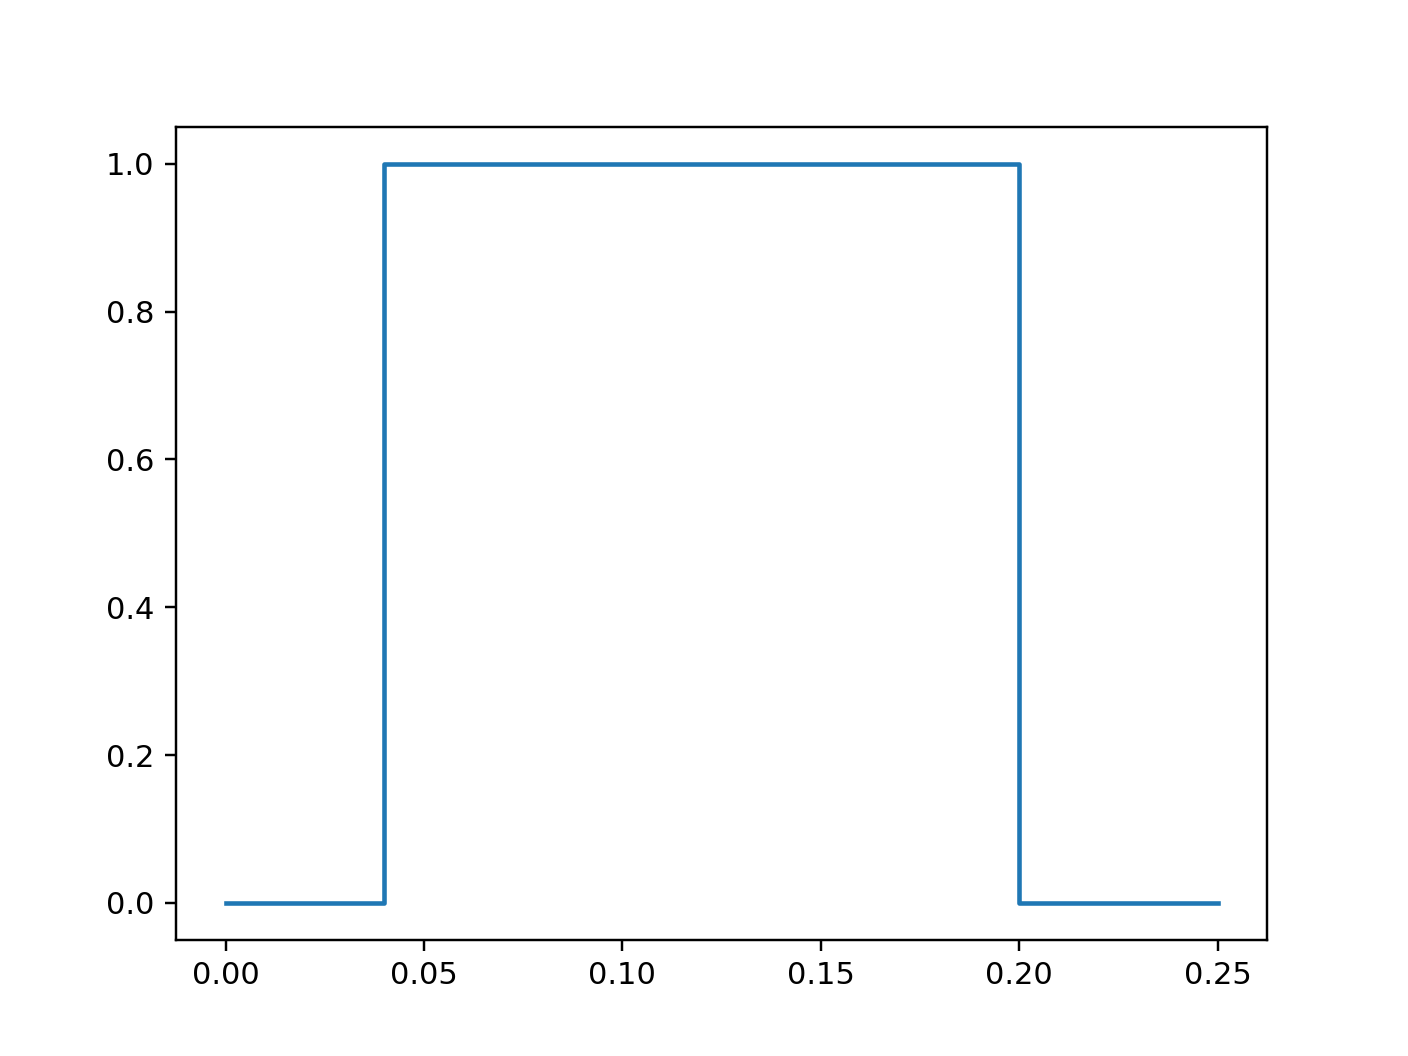

In [72]:
fig1, ax1 = plt.subplots()
t = np.arange(0, 0.24, 0.01)

a = np.array([0.0, 0.01, 0.02, 0.03, 0.04, 
     0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
     0.2, 0.21, 0.22, 0.23, 0.24, 0.25])
w = np.array([0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0])
ax1.plot(a, w)


In [73]:
y0_conv = np.convolve(y0_interp, w, mode='full')

In [86]:
y1_conv = np.convolve(y1_interp, w, mode='full')

In [123]:
y0_conv_same = np.convolve(y0_interp, w, mode='same')

In [122]:
y1_conv_same = np.convolve(y1_interp, w, mode='same')

In [82]:
_arr = np.array(list(a+t_new.max())[1:])

In [83]:
t_conv = np.append(t_new, _arr)

In [93]:
len(y0_conv)

18723

In [94]:
len(y0_interp)

18696

In [109]:
_t = np.arange(131.25, 318.48, 0.01)
len(_t)

18723

In [100]:
np.median(a+t_new.max())

318.45499999982997

In [101]:
np.median(t_new.min()-a)

131.255

In [90]:
len(a)

28

<IPython.core.display.Javascript object>


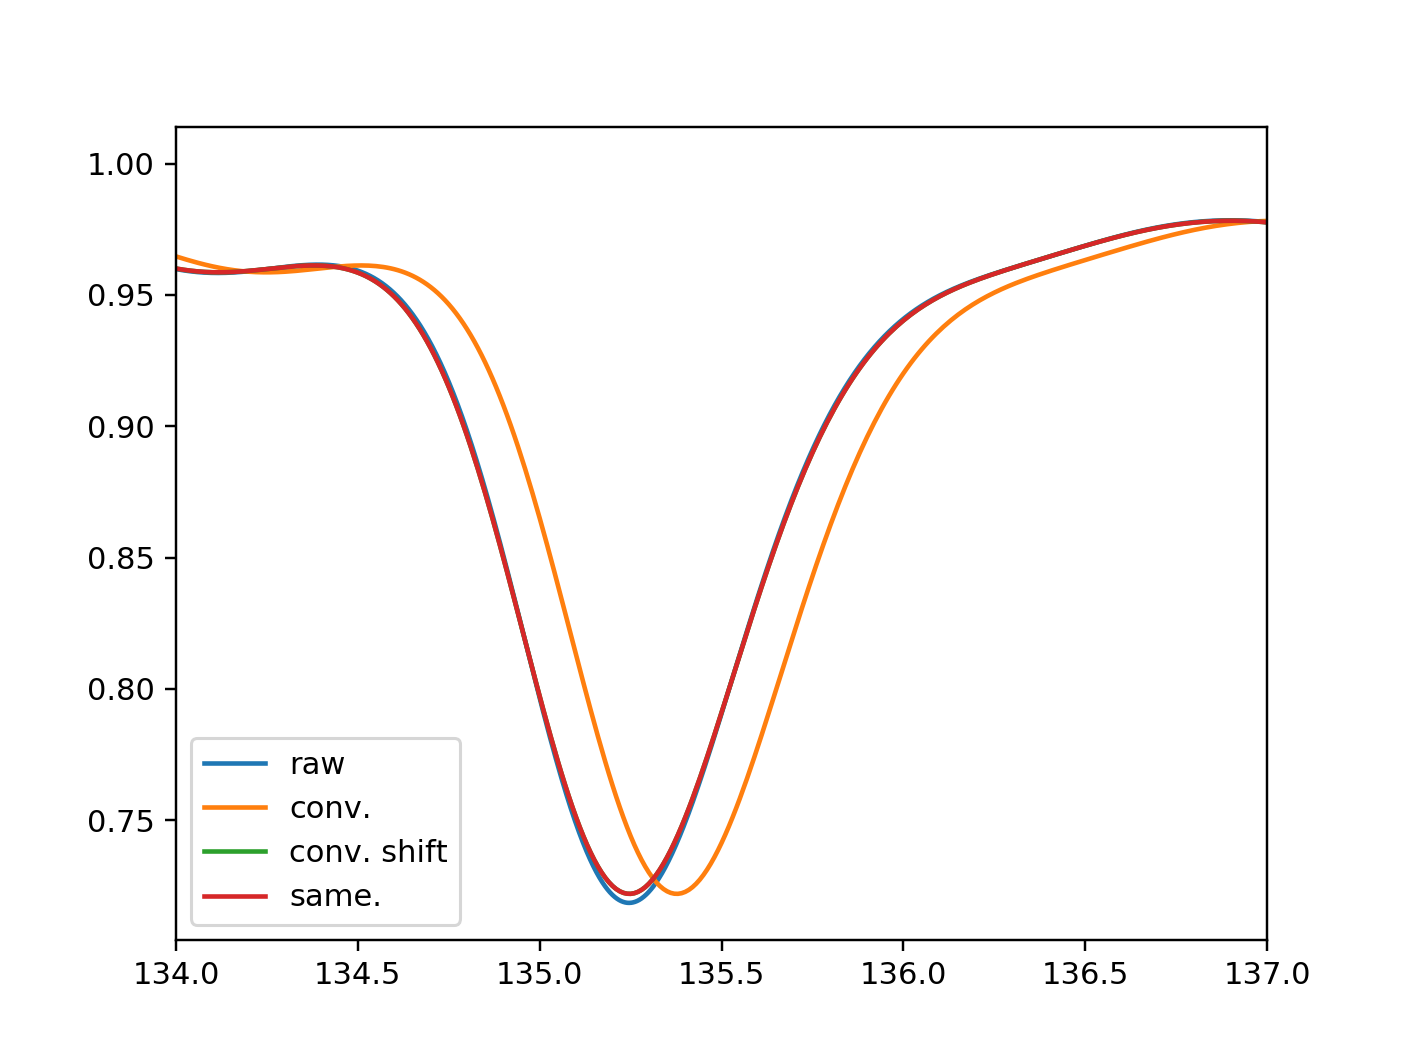

/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in true_divide

/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in true_divide

/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in true_divide

/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



In [125]:
fig2, ax2 = plt.subplots()
ax2.plot(t_us, y1/y0, label='raw')
# ax2.plot(t_new, y1_interp/y0_interp, label='interp.')
ax2.plot(t_conv, y1_conv/y0_conv, label='conv.')
ax2.plot(_t, y1_conv/y0_conv, label='conv. shift')
ax2.plot(t_new, y1_conv_same/y0_conv_same, label='same.')
ax2.set_xlim(left=134, right=137)
ax2.legend()